In [1]:
# Step 1 – Load Data

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
data_path = "../data/clean/cleaned_data.csv"
df = pd.read_csv(data_path, parse_dates=["Date"])
print(f"✅ Dataset loaded successfully. Shape: {df.shape}")

✅ Dataset loaded successfully. Shape: (168156, 17)


In [38]:
# Step 2 – Data Overview

# Display basic information about the dataset
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168156 entries, 0 to 168155
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         168156 non-null  int64         
 1   Dept          168156 non-null  int64         
 2   Date          168156 non-null  datetime64[ns]
 3   Weekly_Sales  168156 non-null  float64       
 4   IsHoliday_x   168156 non-null  bool          
 5   Temperature   168156 non-null  float64       
 6   Fuel_Price    168156 non-null  float64       
 7   MarkDown1     168156 non-null  float64       
 8   MarkDown2     168156 non-null  float64       
 9   MarkDown3     168156 non-null  float64       
 10  MarkDown4     168156 non-null  float64       
 11  MarkDown5     168156 non-null  float64       
 12  CPI           168156 non-null  float64       
 13  Unemployment  168156 non-null  float64       
 14  IsHoliday_y   168156 non-null  bool          
 15  T

In [39]:
# Check summary statistics for markdown features
print("\n Summary statistics for markdown features:")
df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].describe()


 Summary statistics for markdown features:


,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,168156.000000,168156.000000,168156.000000,168156.000000,168156.000000
mean,3522.469411,754.615352,92.940312,1778.908023,1874.722412
std,8161.534772,3909.413917,911.420996,5730.589433,4547.061878
min,0.000000,-192.000000,-29.100000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3751.340000,0.000000,9.560000,813.770000,2340.010000
max,88646.760000,45971.430000,25959.980000,67474.850000,108519.280000


In [40]:
# Step 3 – Time Series Analysis

# Add Week, Month, Year, and Quarter columns for time-based analysis
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.quarter

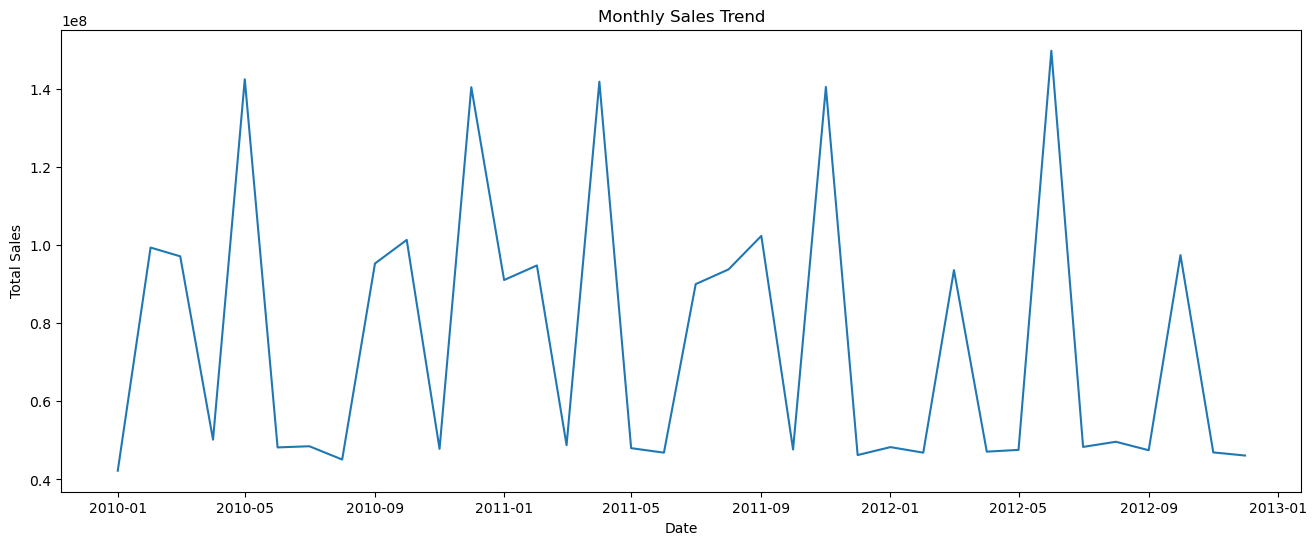

In [51]:
# Step 4 – Sales Drivers

# How do total sales change over time (monthly trend)?
monthly_sales = df.groupby(['Year', 'Month'], as_index=False)['Weekly_Sales'].sum()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot sales trend
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Weekly_Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()
# Sales are highly volatile month-to-month, with several sharp peaks, suggesting strong seasonal demand (likely holiday periods).


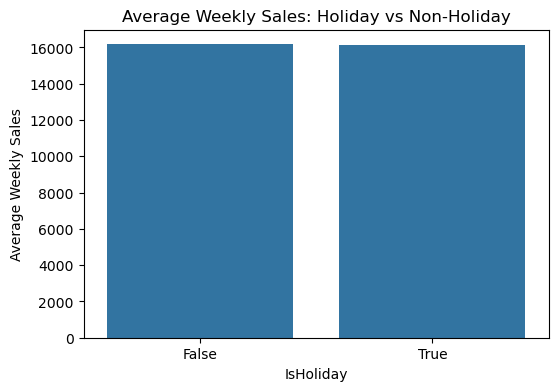

In [76]:
# Do holidays significantly increase weekly sales?
holiday_sales = df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=holiday_sales, x='IsHoliday_x', y='Weekly_Sales')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.xlabel("IsHoliday")
plt.show()
# Surprisingly, average weekly sales during holidays are almost the same as non-holiday weeks. 
# Possibly because not all holiday weeks have promotions.

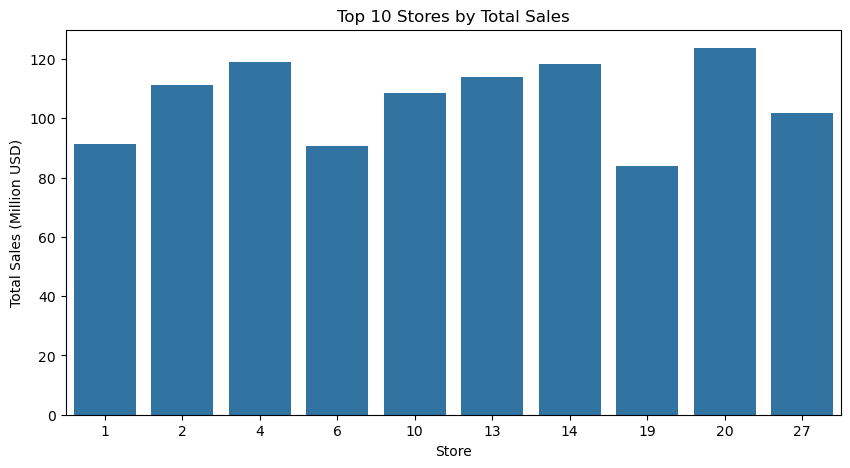

In [73]:
# Which stores generate the highest total sales?
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_stores.index, y=top_stores.values/1_000_000)
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales (Million USD)")

plt.show()
# Stores #4 and #20 outperform others by a large margin, suggesting possible differences in store size, location, or marketing effectiveness.


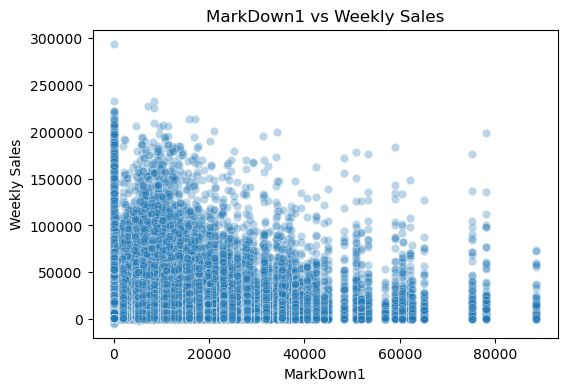

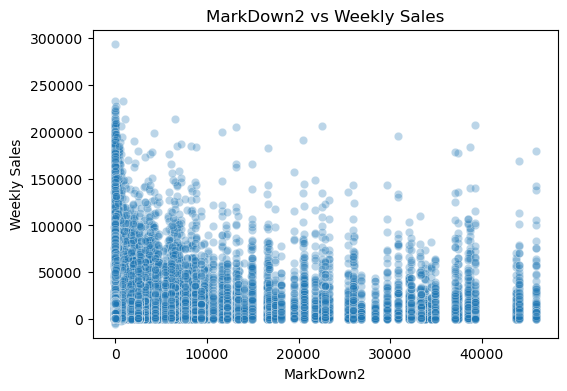

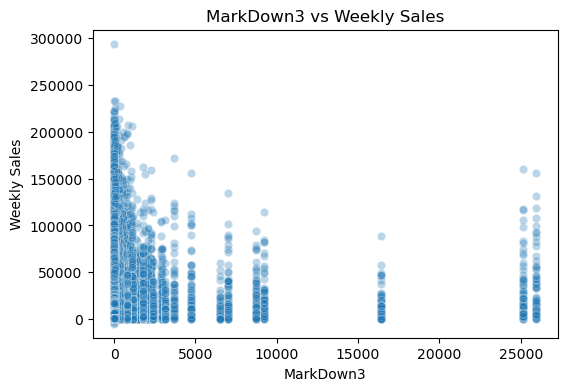

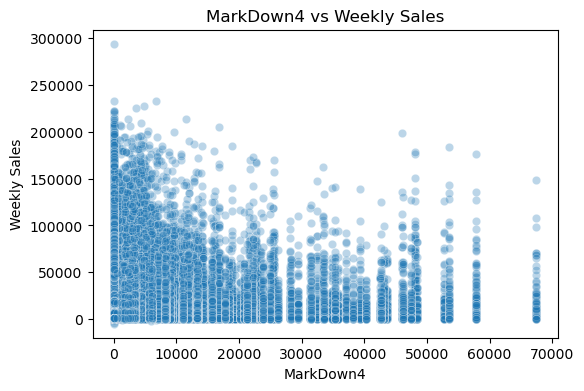

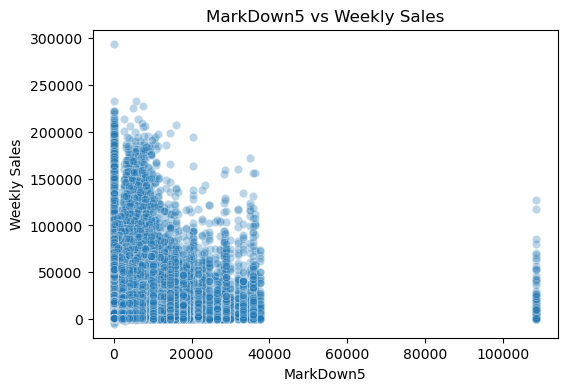

In [50]:
# Do markdowns increase weekly sales?
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Weekly_Sales', alpha=0.3)
    plt.title(f"{col} vs Weekly Sales")
    plt.xlabel(col)
    plt.ylabel("Weekly Sales")
    plt.show()
# Most markdowns have no visible strong correlation with weekly sales (dots are widely scattered).
# MarkDown1 and MarkDown4 show a slight positive relationship for high markdown values, but most weeks had zero markdowns.

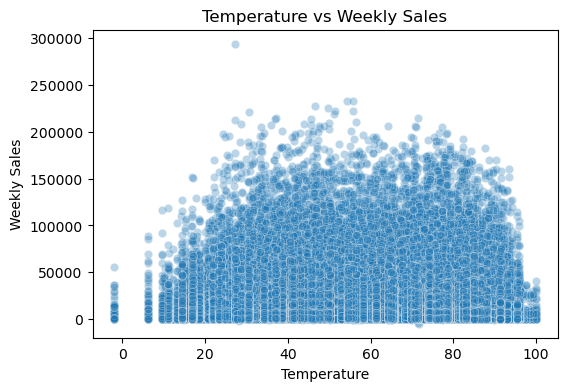

In [20]:
# Does weather (temperature) impact weekly sales?
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.3)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()
# No clear relationship observed. Sales do not strongly depend on weekly temperature variations.

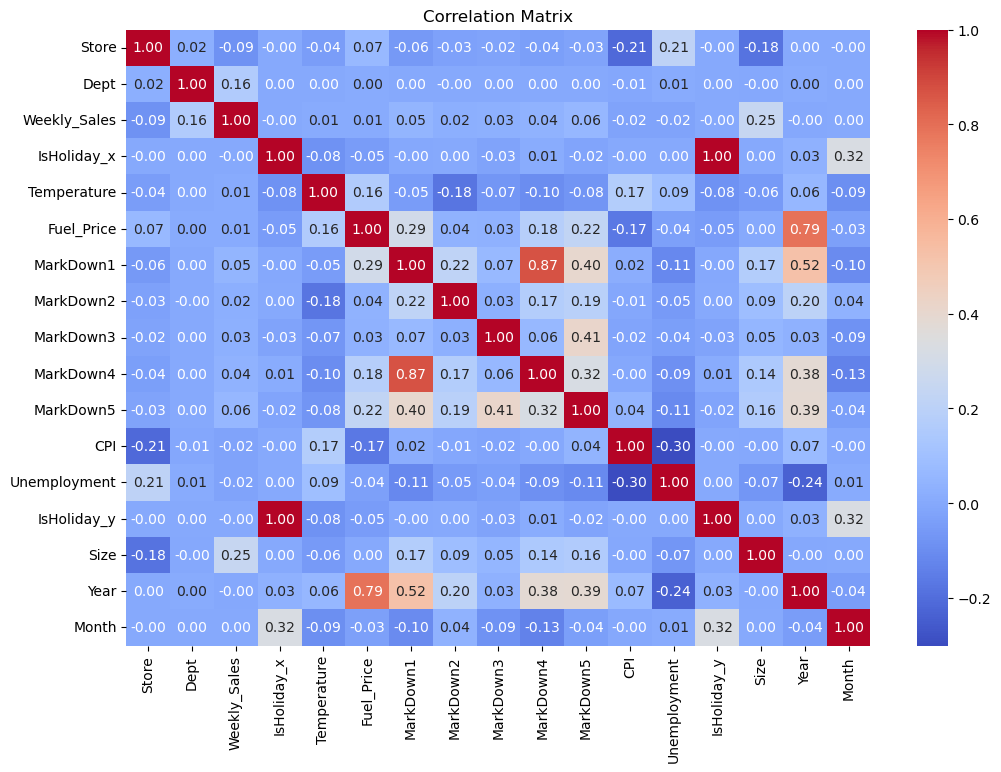

In [22]:
# Plot heatmap of correlations between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Weekly sales show a weak correlation with most features.
# Larger stores tend to sell more (bigger stores usually have more customers) (0.25).
# Dept has a small positive correlation (~0.16).
# Markdown features have negligible correlation except MarkDown5 (~0.06).
# This suggests other unobserved factors (e.g., promotions, store type) may drive sales.